In [68]:
#link- https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#LeaderBoard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
import io
%cd "C:\Users\Dell\Downloads\python"

C:\Users\Dell\Downloads\python


In [70]:
hrtest=pd.read_csv("test_2umaH9m (1).csv")

In [71]:
hrtrain=pd.read_csv("train_LZdllcl (1).csv")

In [72]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [73]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [74]:
print(hrtrain.shape)
print(hrtest.shape)

(54808, 14)
(23490, 13)


# Exploratory Data Analysis

1)univariate analysis

In [75]:
#Various Departments handling by HR
dep_values=hrtrain.department.value_counts().values
dep_names=hrtrain.department.value_counts().index

([<matplotlib.patches.Wedge at 0x26f000d1b50>,
 [Text(0.6261160405772292, 0.9044217510276351, 'Sales & Marketing'),
  Text(-0.9316361186469959, 0.5848539496595375, 'Operations'),
  Text(-0.9658531889033508, -0.5264291191463751, 'Technology'),
  Text(-0.27583991022951315, -1.0648532029930577, 'Procurement'),
  Text(0.4907636247648215, -0.9844547041929831, 'Analytics'),
  Text(0.8715486604487777, -0.6711206541821981, 'Finance'),
  Text(1.0246681229170411, -0.4000690413886927, 'HR'),
  Text(1.0833747810569074, -0.19052318433696752, 'Legal'),
  Text(1.098197033249563, -0.06295455632326008, 'R&D')],
 [Text(0.3415178403148523, 0.49332095510598273, '30.73%'),
  Text(-0.508165155625634, 0.3190112452688386, '20.71%'),
  Text(-0.5268290121291004, -0.28714315589802275, '13.02%'),
  Text(-0.1504581328524617, -0.580829019814395, '13.02%'),
  Text(0.26768924987172077, -0.5369752931961725, '9.76%'),
  Text(0.4753901784266059, -0.36606581137210803, '4.63%'),
  Text(0.558909885227477, -0.21821947712110

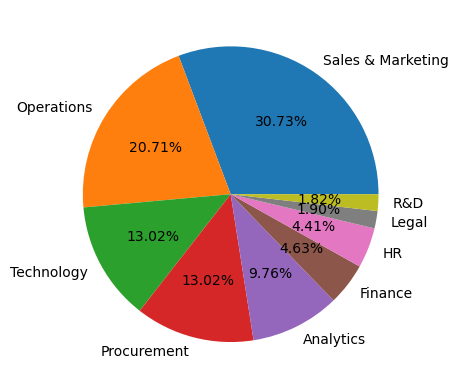

In [76]:
import seaborn as sns
plt.pie(dep_values,labels=dep_names,autopct='%1.2f%%')

We can see that maximum number of people working in Sales & Marketing, Operations departments and least in R&D departments.

array([[<AxesSubplot: title={'center': 'employee_id'}>,
        <AxesSubplot: title={'center': 'no_of_trainings'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'previous_year_rating'}>,
        <AxesSubplot: title={'center': 'length_of_service'}>,
        <AxesSubplot: title={'center': 'KPIs_met >80%'}>],
       [<AxesSubplot: title={'center': 'awards_won?'}>,
        <AxesSubplot: title={'center': 'avg_training_score'}>,
        <AxesSubplot: title={'center': 'is_promoted'}>]], dtype=object)

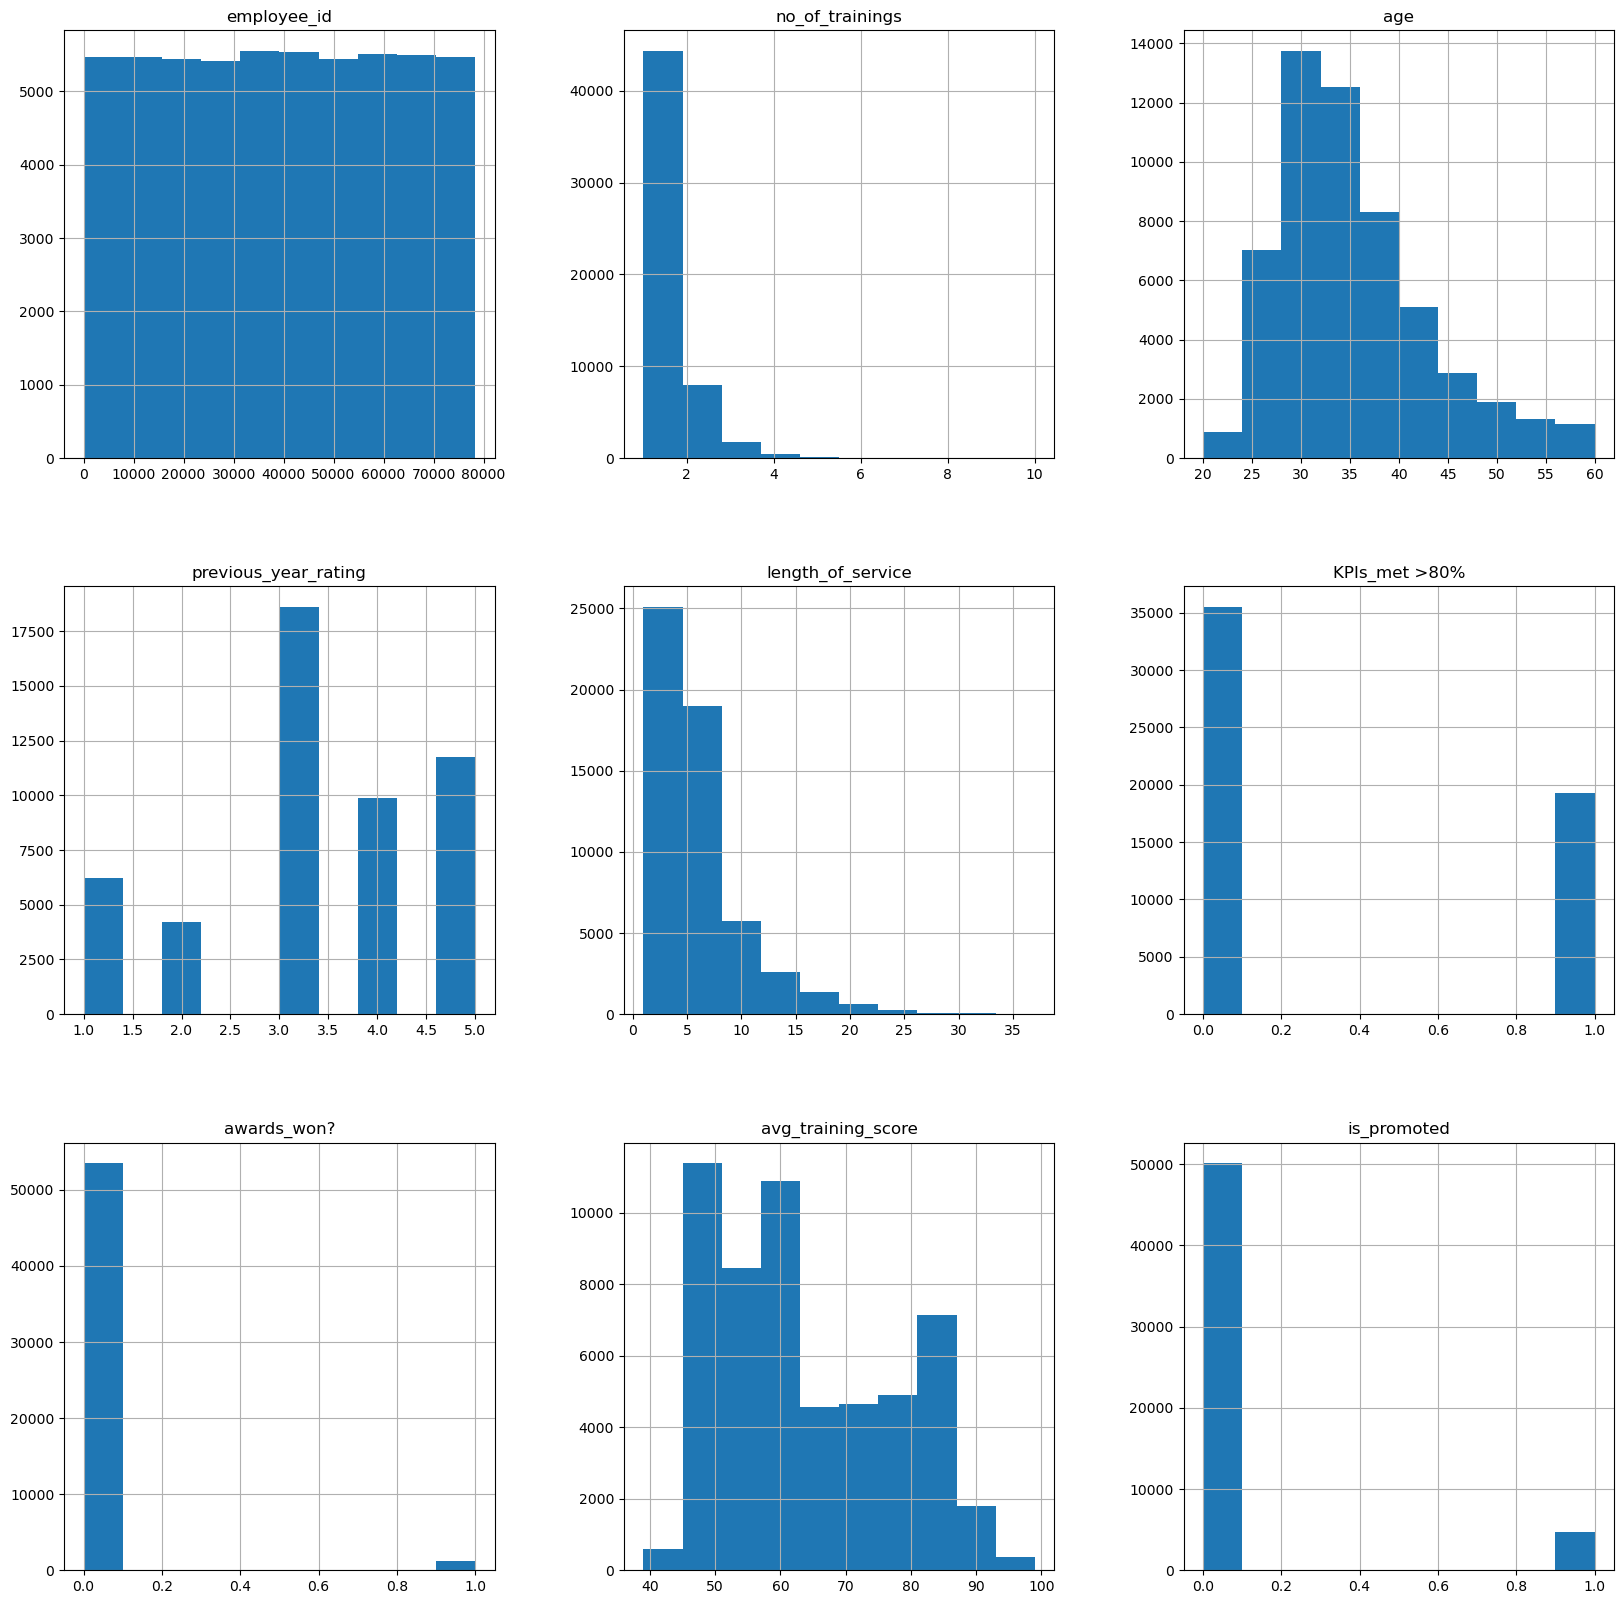

In [77]:
#2)Bivariate Analysis
hrtrain.hist(figsize=(20,20))

In [78]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [79]:
hrtrain[['region','education','gender']].value_counts()

region     education         gender
region_2   Bachelor's        m         4377
region_22  Bachelor's        m         3077
region_2   Bachelor's        f         2870
           Master's & above  m         2237
region_7   Bachelor's        m         1929
                                       ... 
region_21  Below Secondary   m            1
region_14  Below Secondary   m            1
region_1   Below Secondary   f            1
region_28  Below Secondary   f            1
region_33  Master's & above  f            1
Length: 161, dtype: int64

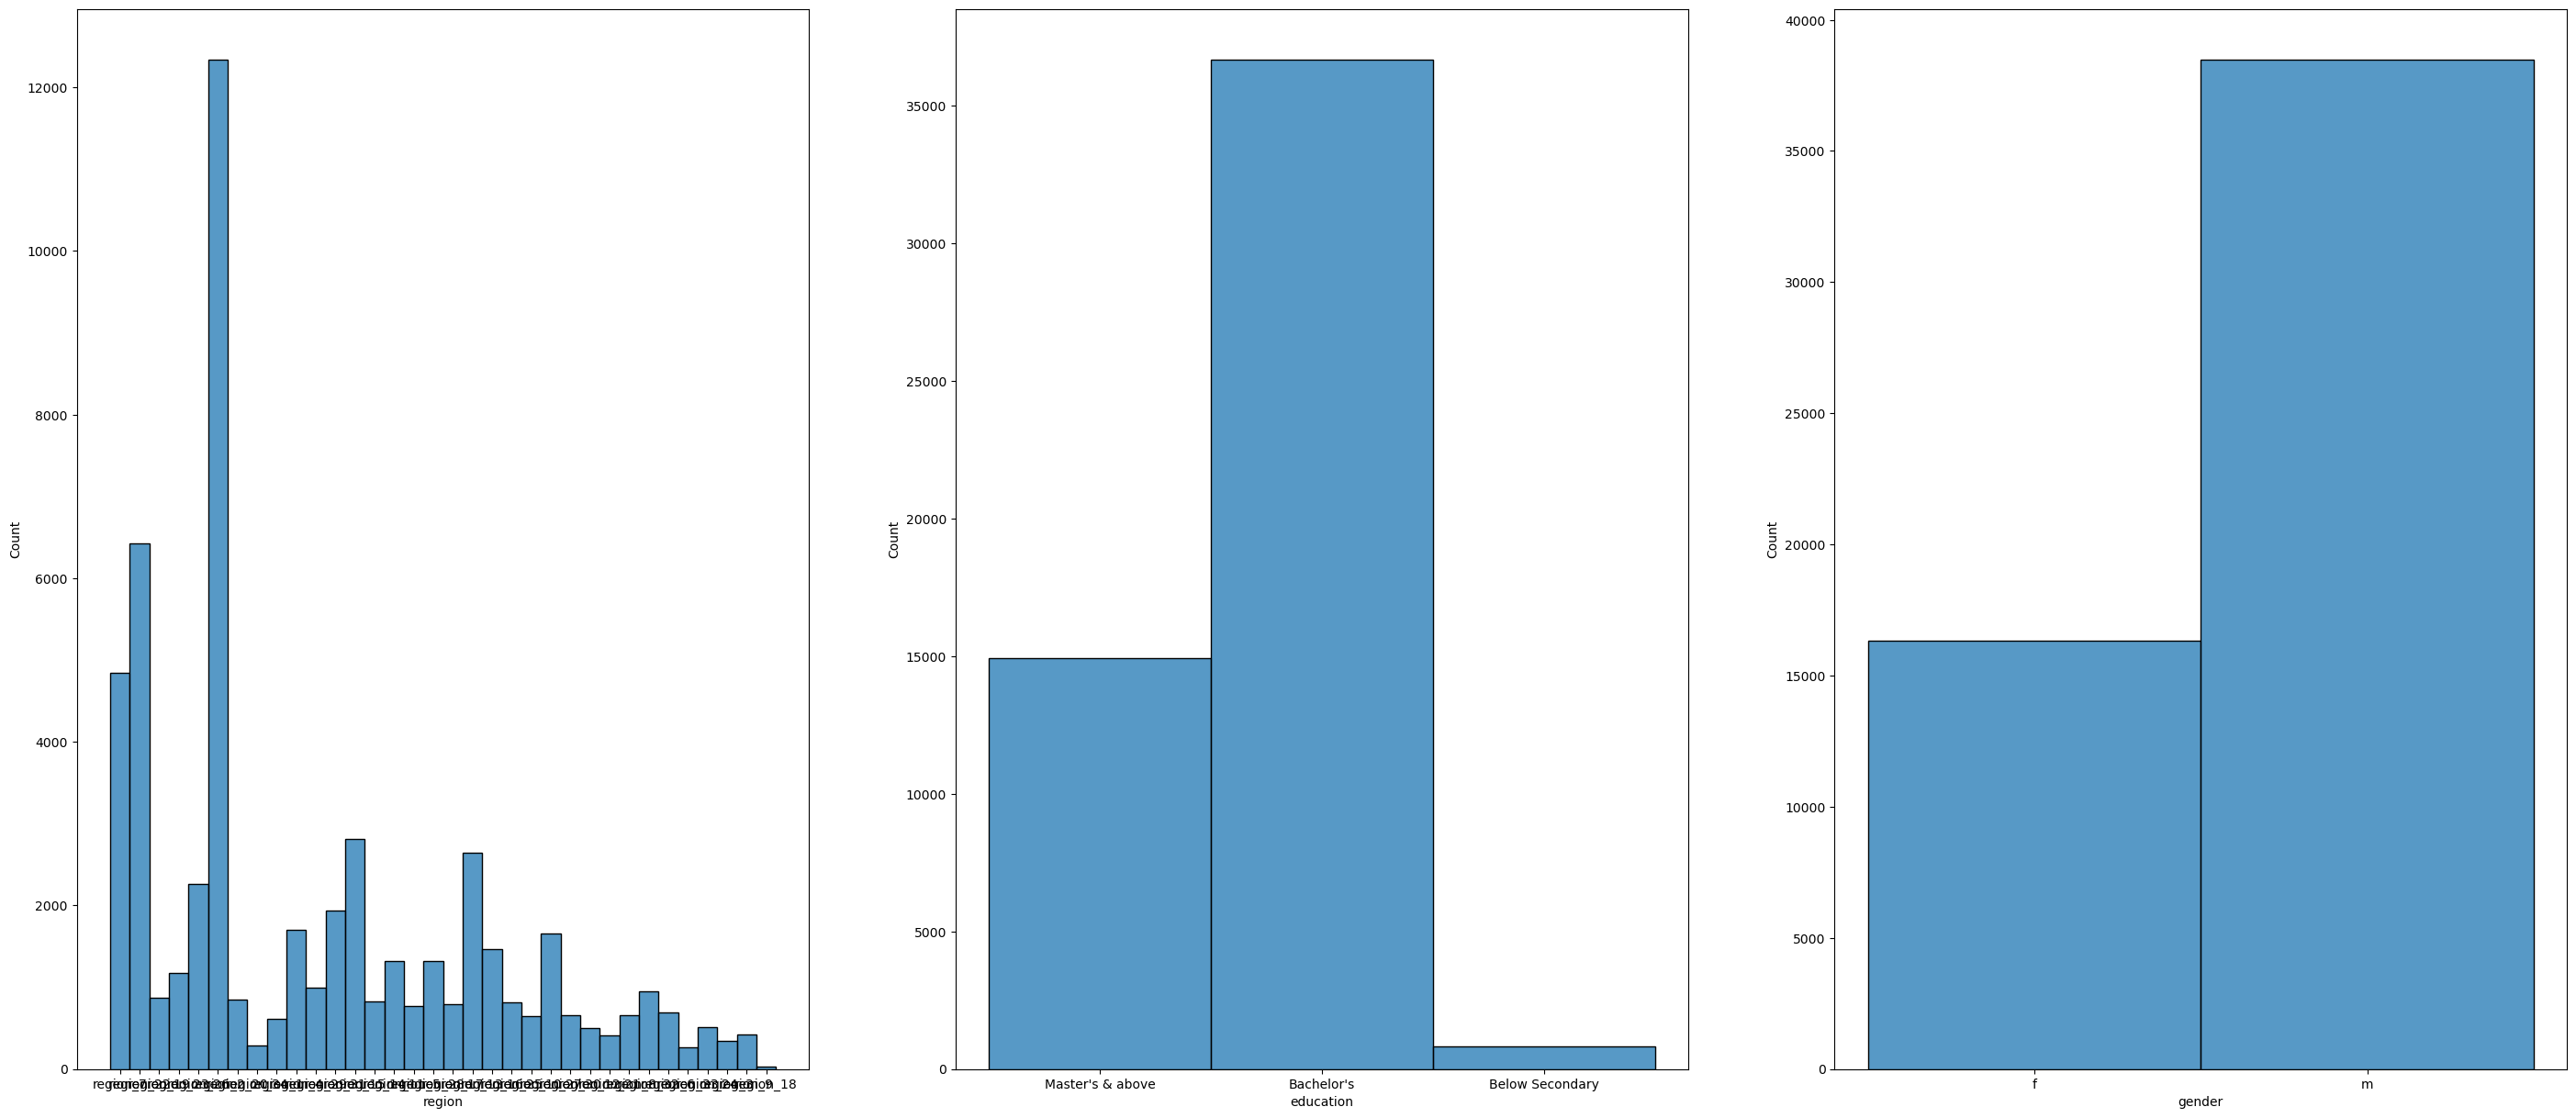

In [80]:
category=hrtrain[['region','education','gender']]
fig, ax=plt.subplots(nrows=1, ncols=3,figsize=(35,15))
for variable , subplot in zip(category,ax.flatten()):
    sns.histplot(hrtrain[variable],ax=subplot)
plt.show()

From above plots, we can see that maximum number of employees from region2, having bachlor's degree and most of them are male employees.

<AxesSubplot: xlabel='awards_won?', ylabel='previous_year_rating'>

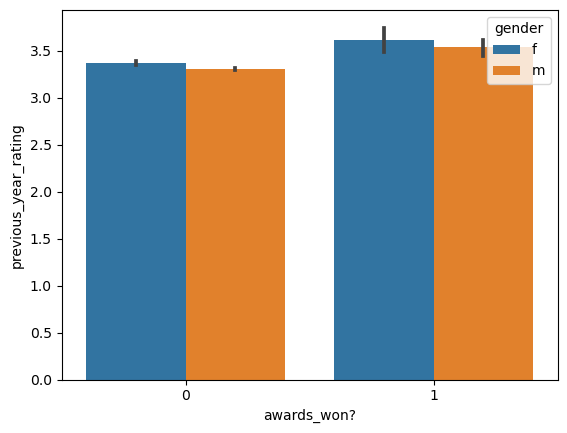

In [81]:
sns.barplot(x=hrtrain['awards_won?'],y=hrtrain['previous_year_rating'],hue=hrtrain['gender'])

From above graph we can see that hald of the employess who have excellnt previous year rating (above>3.0) won the awards and most of them were females.

([<matplotlib.patches.Wedge at 0x26f02ef1430>,
 [Text(-1.0608579614755376, 0.2908270715974823, '0'),
  Text(1.0608579750901341, -0.29082702193513676, '1')],
 [Text(-0.578649797168475, 0.15863294814408124, '91.48%'),
  Text(0.5786498045946186, -0.15863292105552915, '8.52%')])

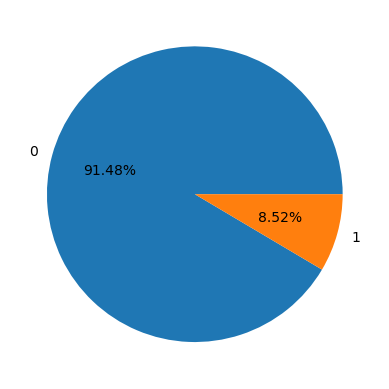

In [82]:
labels = hrtrain['is_promoted'].value_counts().index
values = hrtrain['is_promoted'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%')


As per train data we can see that only 8.52% employees have been promoted.

<AxesSubplot: ylabel='Density'>

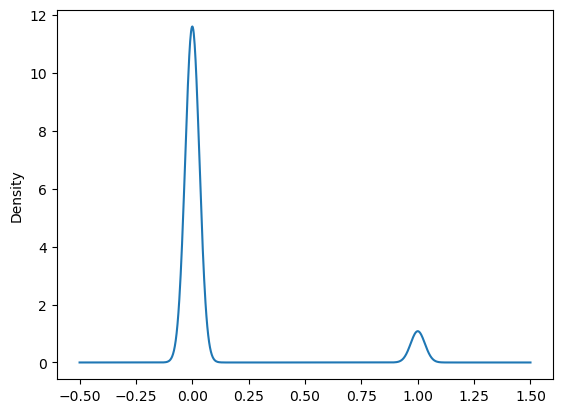

In [83]:
hrtrain['is_promoted'].plot(kind='density')

In [84]:
# Add Dependent Variable temporarily to test data
hrtest['is_promoted']='test'

In [85]:
#concatination of train and test for preprocessing
combinedhr=pd.concat([hrtrain,hrtest],axis=0)

In [86]:
combinedhr.shape

(78298, 14)

In [87]:
# Find Missing Values 
combinedhr.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [88]:
combinedhr.previous_year_rating.describe()

count    72362.000000
mean         3.332219
std          1.260982
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [89]:
combinedhr.previous_year_rating=combinedhr.previous_year_rating.fillna(combinedhr.previous_year_rating.median())

In [90]:
combinedhr.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [91]:
combinedhr.education=combinedhr.education.fillna(combinedhr.education.value_counts().idxmax())

In [92]:
combinedhr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           78298 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 9.0+ MB


In [93]:
combinedhr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [94]:
objectcols=combinedhr[['department', 'region', 'education', 'gender',
       'recruitment_channel','KPIs_met >80%', 'awards_won?']]

In [95]:
objectcols.shape

(78298, 7)

In [96]:
#label encodeing 
from sklearn.preprocessing import LabelEncoder

In [97]:
le=LabelEncoder()

In [98]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [99]:
objectcols_encode.head()

,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
0,7,31,2,0,2,1,0
1,4,14,0,1,0,0,0
2,7,10,0,1,2,0,0
3,7,15,0,1,0,0,0
4,8,18,0,1,0,0,0


In [100]:
numericols=combinedhr[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service','avg_training_score','is_promoted']]

<AxesSubplot: >

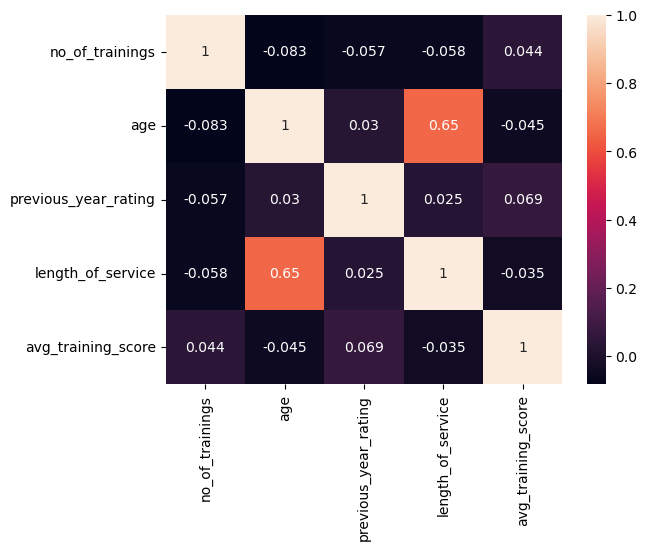

In [101]:
sns.heatmap(numericols.corr(),annot=True)

In [102]:
import seaborn as sns

<AxesSubplot: >

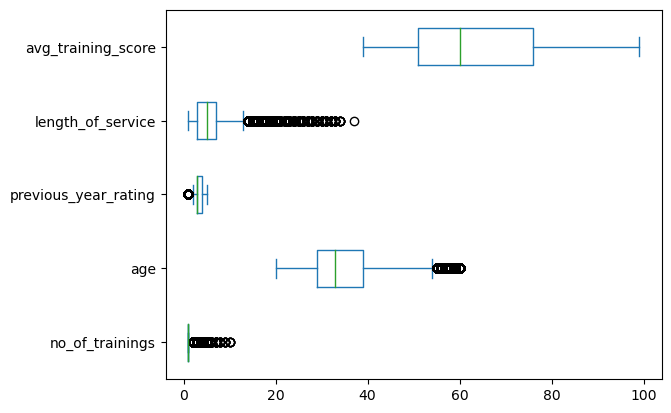

In [103]:
numericols.plot(kind='box',vert=False)

In [104]:
numericols.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,1,35,5.0,8,49,0
1,1,30,5.0,4,60,0
2,1,34,3.0,7,50,0
3,2,39,1.0,10,50,0
4,1,45,3.0,2,73,0


In [105]:
combinedclean=pd.concat([objectcols_encode,numericols],axis=1)

In [106]:
hrtraindf=combinedclean[combinedclean.is_promoted!= 'test']
hrtestdf=combinedclean[combinedclean.is_promoted== 'test']

In [107]:
hrtestdf=hrtestdf.drop('is_promoted',axis=1)

# Hypothesis Testing 

In [108]:
#Test Null average education on 'is_promoted' 0/1 equal
#Null- there is no significant differnce in both the variables
#Alt- there is significant differnce in both the variables
hrtrain['is_promoted'].groupby(hrtrain.education).mean()

education
Bachelor's          0.082031
Below Secondary     0.083230
Master's & above    0.098559
Name: is_promoted, dtype: float64

In [109]:
# Split Data
Bachelors=hrtrain[hrtrain.education=="Bachelor's"]
below_sec=hrtrain[hrtrain.education=="Below Secondary"]
masters_above=hrtrain[hrtrain.education=="Master's & above"]

In [110]:
print(Bachelors.shape)
print(below_sec.shape)
print(masters_above.shape)

(36669, 14)
(805, 14)
(14925, 14)


In [111]:
from scipy.stats import f_oneway

In [112]:
f_oneway(Bachelors['is_promoted'],below_sec['is_promoted'],masters_above['is_promoted'])
#Since p-value is 1.0659027130881227e-08 is less than 0.05, reject null

F_onewayResult(statistic=18.36329148573179, pvalue=1.0659027130881227e-08)

In [113]:
#Test Null average gender on 'is_promoted' 0/1 equal
#Null- there is no significant differnce in both the variables
#Alt- there is significant differnce in both the variables
hrtrain['is_promoted'].groupby(hrtrain.gender).mean()

gender
f    0.089934
m    0.083151
Name: is_promoted, dtype: float64

In [114]:
hrtrain['is_promoted'].groupby(hrtrain.gender).var()

gender
f    0.081851
m    0.076239
Name: is_promoted, dtype: float64

In [115]:
#Split data
f=hrtrain[hrtrain.gender=='f']
m=hrtrain[hrtrain.gender=='m']

In [116]:
print(f.shape)
print(m.shape)

(16312, 14)
(38496, 14)


In [117]:
from scipy.stats import ttest_ind

In [118]:
ttest_ind(f['is_promoted'],m['is_promoted'],equal_var=False)
#since p_value 0.01035868146324101 is less than 0.05 , reject null

Ttest_indResult(statistic=2.563783306069941, pvalue=0.01035868146324101)

# Model building on Imbalance data

In [119]:
#split into x and y
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [120]:
y=y.astype('int')

<AxesSubplot: >

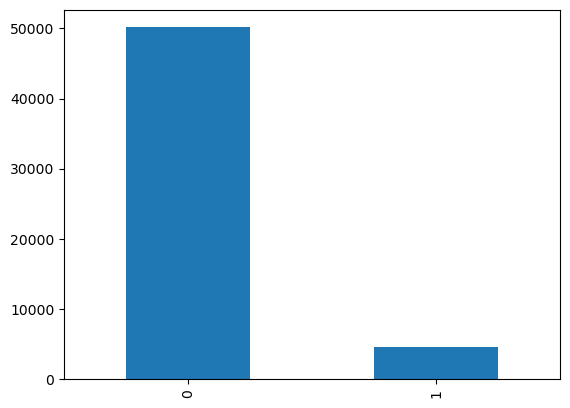

In [121]:
y.value_counts().plot(kind='bar') ## IMbalance data

# SmoteN Imputer for balancing the data

In [122]:
from imblearn.over_sampling import SMOTEN

In [123]:
smote_os = SMOTEN(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X,y)

In [124]:
print(y.value_counts())
print(y_smote.value_counts())

0    50140
1     4668
Name: is_promoted, dtype: int64
0    50140
1    50140
Name: is_promoted, dtype: int64


<AxesSubplot: >

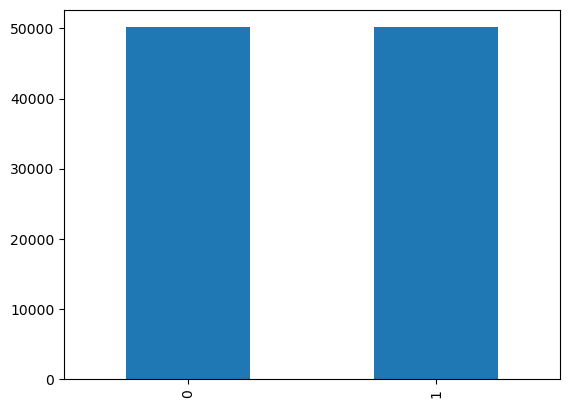

In [125]:
y_smote.value_counts().plot(kind='bar')  #Balanced data

Now we will build the models on balanced data 

# Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
logit=LogisticRegression(max_iter=500)

In [128]:
logitmodel=logit.fit(X_smote,y_smote)

In [129]:
logitmodel.score(X_smote,y_smote)

0.758366573593937

In [130]:
from sklearn.model_selection import cross_val_score
cross_val_score(logit,X_smote,y_smote)

array([0.72257679, 0.76525728, 0.76027124, 0.76720183, 0.77069206])

In [131]:
np.mean(cross_val_score(logit,X_smote,y_smote))

0.7571998404467492

In [132]:
logitpredict=logit.predict(X_smote)

In [133]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
print(classification_report(y_smote,logitpredict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     50140
           1       0.75      0.77      0.76     50140

    accuracy                           0.76    100280
   macro avg       0.76      0.76      0.76    100280
weighted avg       0.76      0.76      0.76    100280



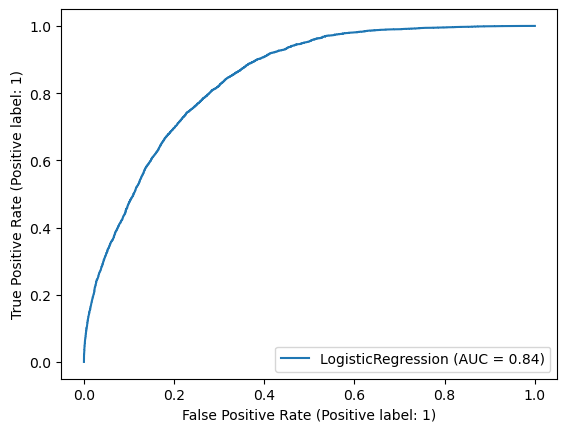

In [134]:
RocCurveDisplay.from_estimator(logit,X_smote,y_smote)

In [135]:
logitpredict1=logitmodel.predict(hrtestdf)

In [136]:
pd.DataFrame(logitpredict1).to_csv('Logit_BD.csv')

# Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
tree=DecisionTreeClassifier(max_depth=10)

In [139]:
treemodel=tree.fit(X_smote,y_smote)

In [140]:
treemodel.score(X_smote,y_smote)

0.8527423214998006

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
cross_val_score(tree,X_smote,y_smote)

array([0.79093538, 0.85719984, 0.85670124, 0.86004188, 0.85889509])

In [143]:
np.mean(cross_val_score(tree,X_smote,y_smote))

0.8447746310331073

In [144]:
treepredict=treemodel.predict(X_smote)

In [145]:
pd.crosstab(treepredict,y_smote)

is_promoted,0,1
row_0,,
0,41217,5844
1,8923,44296


In [146]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(treepredict,y_smote))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     47061
           1       0.88      0.83      0.86     53219

    accuracy                           0.85    100280
   macro avg       0.85      0.85      0.85    100280
weighted avg       0.85      0.85      0.85    100280



In [148]:
from sklearn.metrics import RocCurveDisplay

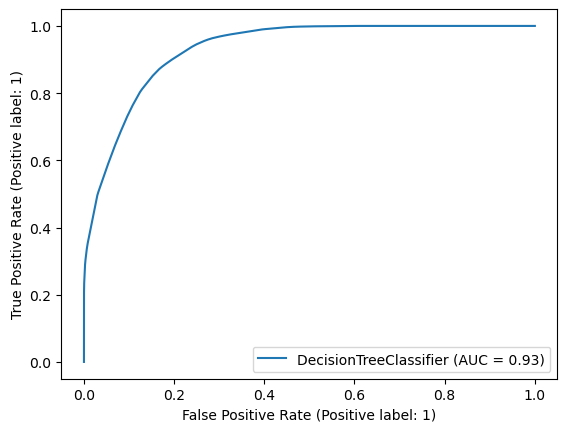

In [149]:
RocCurveDisplay.from_estimator(tree,X_smote,y_smote)

In [150]:
treepredict1=treemodel.predict(hrtestdf)

In [151]:
pd.DataFrame(treepredict1).to_csv('Tree_BD.csv')

# Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
RF=RandomForestClassifier(n_estimators=500,max_depth=10)

In [154]:
Rfmodel=RF.fit(X_smote,y_smote)

In [155]:
Rfmodel.score(X_smote,y_smote)

0.8715496609493418

In [156]:
cross_val_score(RF,X_smote,y_smote)

array([0.79307938, 0.8745014 , 0.87370363, 0.87634623, 0.88098325])

In [157]:
np.mean(cross_val_score(RF,X_smote,y_smote))

0.8595831671320303

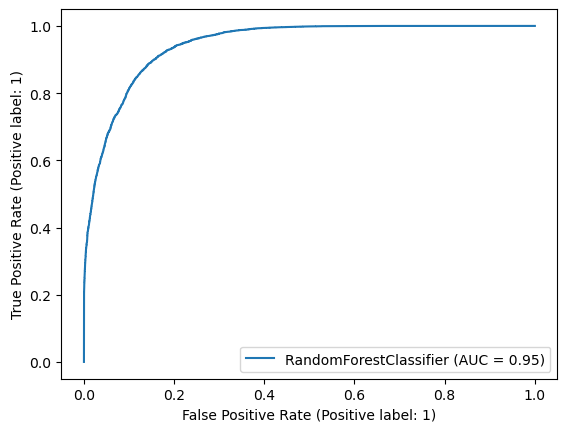

In [158]:
RocCurveDisplay.from_estimator(RF,X_smote,y_smote)

In [159]:
RFpredict=Rfmodel.predict(X_smote)

In [160]:
pd.crosstab(RFpredict,y_smote)

is_promoted,0,1
row_0,,
0,40950,3691
1,9190,46449


In [161]:
print(classification_report(RFpredict,y_smote))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86     44641
           1       0.93      0.83      0.88     55639

    accuracy                           0.87    100280
   macro avg       0.87      0.88      0.87    100280
weighted avg       0.88      0.87      0.87    100280



In [162]:
rfpredict1=Rfmodel.predict(hrtestdf)

In [163]:
pd.DataFrame(rfpredict1).to_csv('RF_BD.csv')

# Gradient Boosting Classifier

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
gbm=GradientBoostingClassifier(n_estimators= 2000)

In [166]:
gbmmodel=gbm.fit(X_smote,y_smote)

In [167]:
gbmmodel.score(X_smote,y_smote)

0.9245612285600319

In [168]:
cross_val_score(gbmmodel,X_smote,y_smote)

array([0.84523335, 0.93129238, 0.93263861, 0.93204029, 0.93243917])

In [169]:
np.mean(cross_val_score(gbmmodel,X_smote,y_smote))

0.9147287594734743

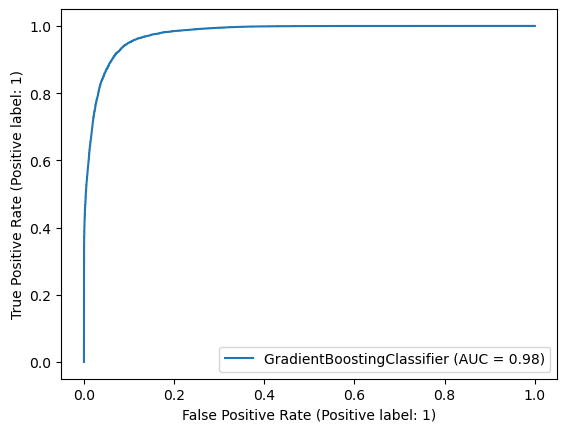

In [170]:
RocCurveDisplay.from_estimator(gbm,X_smote,y_smote)

In [171]:
gbmpredict=gbmmodel.predict(X_smote)

In [172]:
pd.crosstab(gbmpredict,y_smote)

is_promoted,0,1
row_0,,
0,44948,2373
1,5192,47767


In [173]:
print(classification_report(gbmpredict,y_smote))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     47321
           1       0.95      0.90      0.93     52959

    accuracy                           0.92    100280
   macro avg       0.92      0.93      0.92    100280
weighted avg       0.93      0.92      0.92    100280



In [174]:
gbmpredict1=gbmmodel.predict(hrtestdf)

In [175]:
pd.DataFrame(gbmpredict1).to_csv('gbm_BD.csv')

# Naive Bais Model

In [116]:
from sklearn.naive_bayes import CategoricalNB 

In [117]:
nb=CategoricalNB()

In [118]:
nbmodel=nb.fit(X_smote,y_smote)

In [119]:
nbmodel.score(X_smote,y_smote)

0.8014359792580774

In [ ]:
cross_val_score(nbmodel,X_smote,y_smote)

In [ ]:
np.mean(cross_val_score(gbmmodel,X_smote,y_smote))

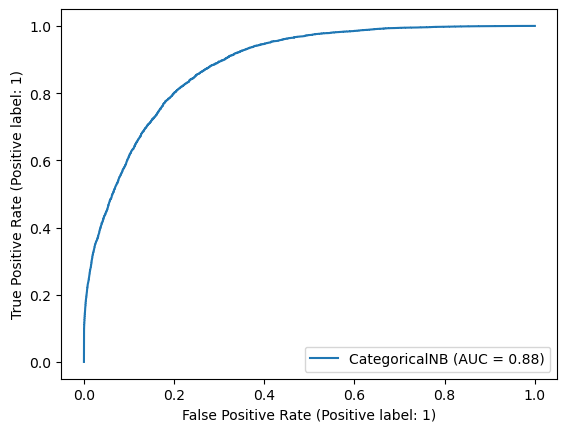

In [120]:
RocCurveDisplay.from_estimator(nb,X_smote,y_smote)

In [121]:
nbpredict=nbmodel.predict(X_smote)

In [122]:
pd.crosstab(nbpredict,y_smote)

is_promoted,0,1
row_0,,
0,39441,9213
1,10699,40927


In [123]:
print(classification_report(nbpredict,y_smote))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     48654
           1       0.82      0.79      0.80     51626

    accuracy                           0.80    100280
   macro avg       0.80      0.80      0.80    100280
weighted avg       0.80      0.80      0.80    100280



In [124]:
nbpredict1=nbmodel.predict(hrtestdf)

In [125]:
pd.DataFrame(nbpredict1).to_csv('nb_BD.csv')

# Support Vector Machine model (SVC)

In [126]:
from sklearn.svm import SVC

In [127]:
svm=SVC(probability=True)

In [128]:
svmmodel=svm.fit(X_smote,y_smote)

In [129]:
svmmodel.score(X_smote,y_smote)

0.7741224571200638

In [ ]:
np.mean(cross_val_score(svmmodel,X_smote,y_smote))

In [ ]:
np.mean(cross_val_score(svmmodel,X_smote,y_smote))

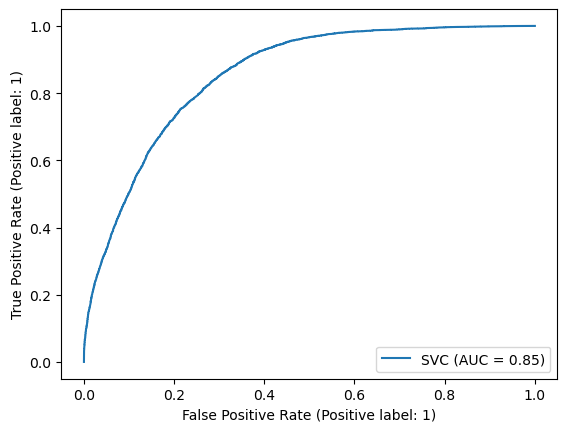

In [130]:
RocCurveDisplay.from_estimator(svm,X_smote,y_smote)

In [131]:
svmpredict=svmmodel.predict(X_smote)

In [132]:
pd.crosstab(svmpredict,y_smote)

is_promoted,0,1
row_0,,
0,36373,8884
1,13767,41256


In [133]:
print(classification_report(svmpredict,y_smote))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     45257
           1       0.82      0.75      0.78     55023

    accuracy                           0.77    100280
   macro avg       0.77      0.78      0.77    100280
weighted avg       0.78      0.77      0.77    100280



In [134]:
svmpredict1=svmmodel.predict(hrtestdf)

In [135]:
pd.DataFrame(svmpredict1).to_csv('svm_BD.csv')

# Conclusion:

I entered the predicted test values into the competition HR Analytics challenge on the https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#MySubmissions. Of all of the models The most accurate classification method is gradient boosting with accuracy 0.4285